<body><h3>1. Importing all required libraries.</h3></body>

In [144]:
import pandas as pd    # Library for reading the file/data (data processing)
import numpy as np     # Library for performing math
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns    # To plot graphs
from scipy import stats  # To perform statistic functions

<body><h3>2. Reading the data as the data frame.</h3></body>

In [145]:
dataframe = pd.read_csv('insurance.csv')  # Reading the dataset 
dataframe.head()   # Showing first 5 records

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<body><h3>3a. Shape of the data</h3></body>

In [146]:
dataframe.shape   # Gives the count of columns and rows of the dataframe

(1338, 7)

<body>This shows that there are 1339 rows, each having 7 columns</body>

<body><h3>3b. Data Types of each attribute.</h3></body>

In [147]:
dataframe.dtypes   # Displays the datatypes of each column of dataframe 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<body><h3>3c.Checking the presence of missing value.</h3><br>
This can be seen in two ways, by using info() or isnull() methods.</body>

In [148]:
dataframe.info()    # Checks whether there is any null value in each column and gives the summary
dataframe.isnull()  # Checks whether there is any null value comparing each value individually

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<body><h3>3d. 5 point summary of numerical attributes.</h3><br>
Here number of children can be taken as categorical value rather than numerical. So, converting its datatype into string object.<br>
The describe() method gives the required 5 point summary.</body>

In [149]:
dataframe['children']=dataframe['children'].astype('str')# Converting the datatype of children attribute to string
dataframe.describe()  # One of the way to get 5 point summary


,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


<body><h3>3e. Distribution of 'bmi', 'age', 'charges' columns</h3><br>
This can be done using histogram.</body>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc62642f470>,
      dtype=object)

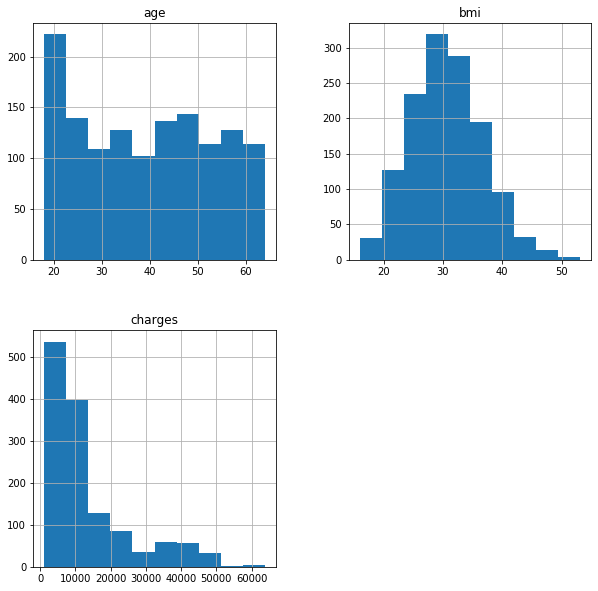

In [150]:
dataframe.hist(figsize=(10,10))   # Ploting the histogram of BMI Age and Charges

<body><h3>3f. Measuing the skewness of the bmi, age, charges columns.</h3></body>

In [151]:
dataframe.skew(axis=0,numeric_only=True)  # getting the skewness of numerical attributes only

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

The above information shows that age and bmi data are bit normally skewed whereas charges is right skewed. This can also be seen in below box plot.

<body><h3>3g. Checking the presence of outliers in bmi, age and charges columns.</h3></body>

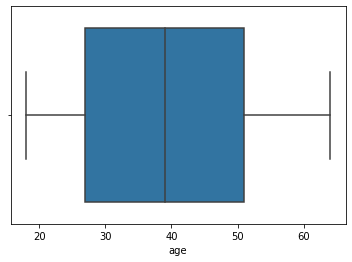

In [152]:
fig1=sns.boxplot(x=dataframe['age'])  # Ploting box plots for checking outliers

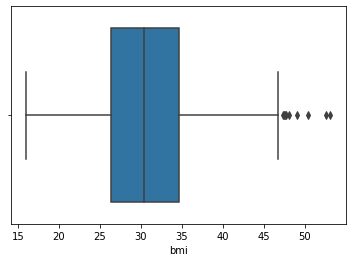

In [153]:
fig3=sns.boxplot(x=dataframe['bmi'])

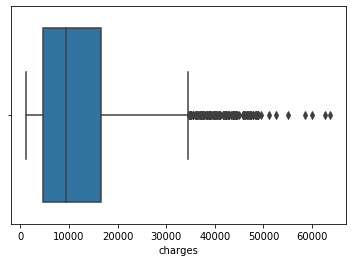

In [154]:
fig3=sns.boxplot(x=dataframe['charges'])

The above box plot clearly shows there are some outliers present.So, determining those points.

In [155]:
# Determining which points maybe outliers by calculating the zscore 
# And checking whether it exceeds the threshold (i.e 3) 
# Then displaying the coresponding values along with the attribute

for i in dataframe:
    if dataframe[i].dtypes!='object':
        k= abs(stats.zscore(dataframe[i]))
        for j in range(len(k)):
            if k[j]>3:
                print(dataframe[i][j],"of attribute ",i," having z_value ",k[j])
         

49.06 of attribute  bmi  having z_value  3.0178611981425605
50.38 of attribute  bmi  having z_value  3.234399911917402
52.58 of attribute  bmi  having z_value  3.595297768208803
53.13 of attribute  bmi  having z_value  3.685522232281654
51194.55914 of attribute  charges  having z_value  3.132806075214621
63770.42801 of attribute  charges  having z_value  4.17166316317004
58571.074479999996 of attribute  charges  having z_value  3.7421592200817297
55135.402089999996 of attribute  charges  having z_value  3.45834800583167
52590.82939 of attribute  charges  having z_value  3.248148025811295
60021.39897 of attribute  charges  having z_value  3.8619664391173902
62592.87309 of attribute  charges  having z_value  4.074388669634486


<h3>3h. Distribution of categorical value.</h3>

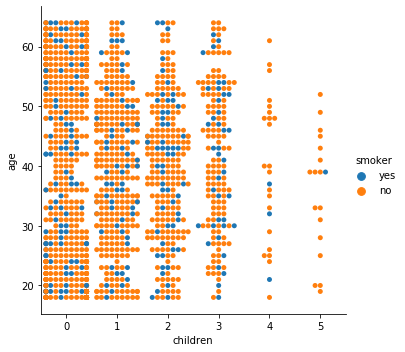

In [156]:
# Using categorical plot for plotting the distribution of categorical value
sns.catplot(x='children',y='age',hue='smoker',kind="swarm",data=dataframe)

We can see that the age group of people having a no or single child tend to have habit of smoking than others.

<h3>3f. Pair plot that includes all the columns of the dataframe.</h3>

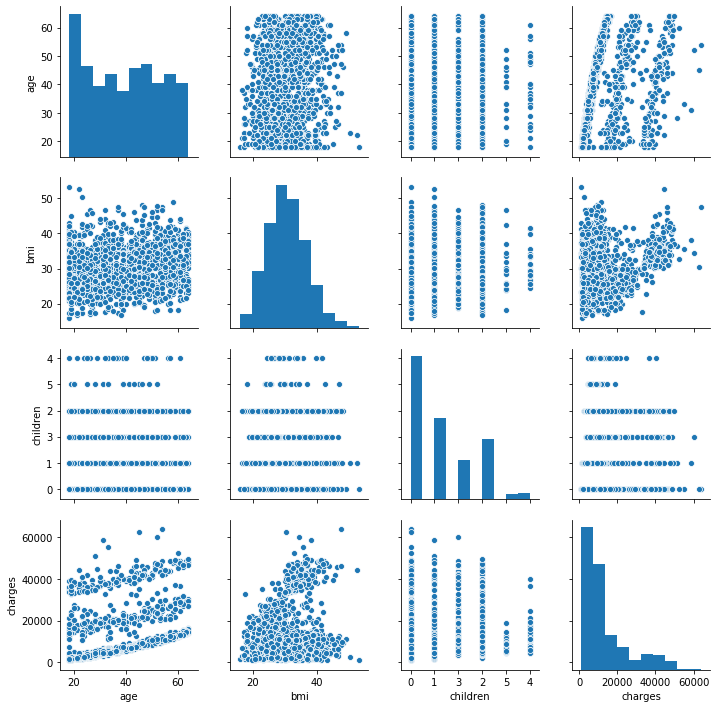

In [157]:
sns.pairplot(dataframe)

<h3>4a. Do charges of people who smoke differ significantly from the people who don't?</h3>

Lets check the charge on total number of people who smoke across the age.

no     1064
yes     274
Name: smoker, dtype: int64


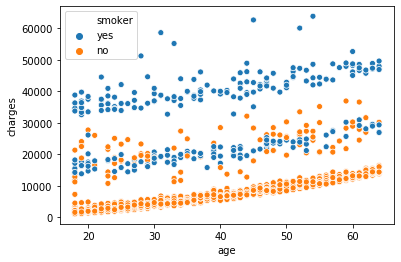

In [158]:
count=dataframe.smoker.value_counts() # Getting the count number of smokers
print(count)
sns.scatterplot(x=dataframe.age,y=dataframe.charges,hue=dataframe.smoker) # Scatterplot of smokers of different
                                                                         #  ages against charges

From the count and the scatter plot it shows there is significant difference between people who smoke and who don't.
<br>
Clarifing it by T-Test.<br>
Let Ho = Null Hypothesis = "Charges on people are same"<br>
    Halt = Alternate Hypothesis ="Charges differ on people who smoke and who don't"

In [159]:
# using ttest_ind() which returns t-statistics and p-value
# then we check whether p_value is in our significance level (i.e 5%) to reject Ho or not
t,p_value=stats.ttest_ind(dataframe[dataframe['smoker']=='yes'].charges,dataframe[dataframe['smoker']=='no'].charges)
p_value,t

(8.271435842177219e-283, 46.664921172723716)

In [160]:
print('charges of people who smoke differ significantly from the people' if p_value<0.05 else 'charges of people who smoke do not differ significantly from the people' )

charges of people who smoke differ significantly from the people


So the Null Hypothesis is rejected.

<h3> 4b. Does bmi of males differ significantly from that of females? </h3>

Lets check the bmi on female and male across the age.

male      676
female    662
Name: sex, dtype: int64


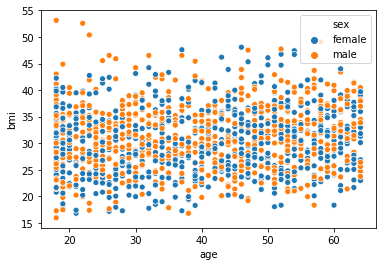

In [161]:
count=dataframe.sex.value_counts()  # .value_counts() is used to get the count of each value in that attribute
print(count)
sns.scatterplot(x=dataframe.age,y=dataframe.bmi,hue=dataframe.sex)

From the scatter plot it shows there is no significant difference between bmi between male and female.
<br>
Clarifing it by T-Test.<br>
Let Ho = Null Hypothesis = "bmi is same for male and female."<br>
    Halt = Alternate Hypothesis ="bmi differs from male to female significantly"

In [162]:
t,p_value=stats.ttest_ind(dataframe[dataframe['sex']=='male'].bmi,dataframe[dataframe['sex']=='female'].bmi)
t,p_value

(1.696752635752224, 0.08997637178984932)

In [163]:
print('bmi of males differ significantly from that of females' if  p_value<0.05 else 'bmi of males do not differ significantly from that of females')

bmi of males do not differ significantly from that of females


Thus, its fail to reject the null hypothesis.

<h3>4c. Is the proportion of smokers significantly different in different genders?</h3>

Lets check the smokers across the age based on gender.

In [164]:
dataframe.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

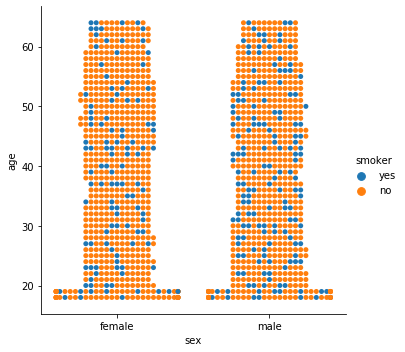

In [165]:
sns.catplot(x='sex',y='age',hue='smoker',kind="swarm",data=dataframe,)

The difference of proportion of smoker is not apparent. So will go with t-test.
<br>
Let Ho = Null Hypothesis = "Propostion of smokers is same across gender"<br>
    Halt = Alternate Hypothesis ="Propostion of smokers differs across gender"

In [166]:
tabular=pd.crosstab(dataframe.sex,dataframe.smoker) # Here cross tab is used as we need the count of 2 categorical attributes
tabular

smoker,no,yes
sex,,
female,547,115
male,517,159


In [167]:
# Here as chi-sqaure test is required, we use chi2_contingency() method of scipy library
# which returns t-statistics, p_value,degree of freedom and expected frequency
# then p_value is compared with significance level
chi2,p_value,deg_of_freedom,expected_arr=stats.chi2_contingency(tabular)
p_value

0.006548143503580696

In [168]:
print('proportion of smokers significantly different in different genders' if  p_value<0.05 else 'proportion of smokers is similar in different genders')

proportion of smokers significantly different in different genders


So the Null Hypothesis is rejected.

<h3>4d. Is the distribution of bmi across women with no children, one child and two children, the same ?</h3>

<br>
Let Ho = Null Hypothesis = "Number of children doesnot matter in BMI"<br>
    Halt = Alternate Hypothesis ="Number of children matters in BMI"

In [169]:
data_female=dataframe[dataframe.sex=='female'] # Collecting the data of only female 


In [170]:
# As 1-way ANOVA should be used on the group having same size, f_oneway() method of skipy is used 
# which returns f-value and p_value.
f_stat, p_value = stats.f_oneway(data_female[data_female.children=='0'].bmi,
                                 data_female[data_female.children=='1'].bmi,
                                 data_female[data_female.children=='2'].bmi)
p_value


0.7158579926754841

In [171]:
print('Number of children doesnot effect BMI of women' if  p_value<0.05 else 'Number of children doesnot effect BMI of women')

Number of children doesnot effect BMI of women


Thus it fails to reject our Null hypothesis

<br><br><h5>Thank You<h5>